# 🔍 3.2 Actividad 2 | Más expresiones Regulares y matrices de conteo y tf-idf - Semanas 3 y 4

# 📆 12 de Mayo de 2025

# 🧑‍🎓 A01795838: Javier Augusto Rebull Saucedo

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [1]:
# ———————————————
# Librerías de manipulación de datos
# ———————————————
import pandas as pd      # Estructuras de datos y análisis (DataFrames, Series)
import numpy as np       # Álgebra lineal y operaciones numéricas

# ———————————————
# Librerías de procesamiento de lenguaje natural (NLP)
# ———————————————
import nltk              # Toolkit de PLN: tokenización, etiquetado, etc.
from nltk.corpus import stopwords  # Listas de palabras vacías (stopwords)

# ———————————————
# Librerías estándar para manejo de texto
# ———————————————
import re                # Expresiones regulares
import string            # Constantes y utilidades de texto (e.g., punctuation)

# ———————————————
# Utilidad de descarga y carga desde Google Drive
# ———————————————
import gdown              # Herramienta para descargar archivos desde Google Drive


# ———————————————
# Carga silenciosa de CSVs sin warnings
# ———————————————
import csv               # Para manejar opciones de quoting
import warnings          # Para Evitar ver warnings no deseados

# Silenciar exclusivamente los ParserWarnings de pandas
warnings.filterwarnings('ignore', category=pd.errors.ParserWarning)

In [2]:
# ———————————————
# Descarga de recursos de NLTK
# ———————————————
nltk.download('punkt')      # Descarga el modelo 'punkt' para dividir texto en oraciones y tokens usando un enfoque basado en aprendizaje no supervisado.
                            # Útil para tokenización precisa antes de procesar o analizar estructuras de texto.
nltk.download('stopwords')  # Descarga las listas de "stopwords" (palabras vacías) en múltiples idiomas.
                            # Estas listas ayudan a filtrar palabras de alto uso pero bajo contenido semántico (e.g., "el", "and", "the").

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

---

In [3]:
# ———————————————
# Exploración de stopwords en inglés
# ———————————————

# Cargar lista de stopwords en inglés
stopwords_engl = stopwords.words('english')

# Mostrar total de stopwords
print(f"Total de stopwords en inglés: {len(stopwords_engl)}\n")

# Imprimir 10 palabras por línea con numeración de bloque
for bloque_idx in range(0, len(stopwords_engl), 10):
    bloque = stopwords_engl[bloque_idx : bloque_idx + 10]
    línea_num = bloque_idx // 10 + 1
    # Unir las 10 palabras con comas y espacio
    print(f"{línea_num:2d}: " + ", ".join(bloque))


Total de stopwords en inglés: 198

 1: a, about, above, after, again, against, ain, all, am, an
 2: and, any, are, aren, aren't, as, at, be, because, been
 3: before, being, below, between, both, but, by, can, couldn, couldn't
 4: d, did, didn, didn't, do, does, doesn, doesn't, doing, don
 5: don't, down, during, each, few, for, from, further, had, hadn
 6: hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd
 7: he'll, her, here, hers, herself, he's, him, himself, his, how
 8: i, i'd, if, i'll, i'm, in, into, is, isn, isn't
 9: it, it'd, it'll, it's, its, itself, i've, just, ll, m
10: ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself
11: needn, needn't, no, nor, not, now, o, of, off, on
12: once, only, or, other, our, ours, ourselves, out, over, own
13: re, s, same, shan, shan't, she, she'd, she'll, she's, should
14: shouldn, shouldn't, should've, so, some, such, t, than, that, that'll
15: the, their, theirs, them, themselves, then, there, these, they, they

In [4]:
# ———————————————
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:
# ———————————————
negwords = [
    # 🛑 Negaciones absolutas (bloquean el sentido completo)
    'no', 'nor', 'not',

    # 🔧 Formas base sin apóstrofe (útiles para tokenización cruda)
    'ain', 'aren', 'don', 'couldn', 'didn', 'doesn',
    'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn',
    'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',

    # 📎 Contracciones completas (como aparecen en el texto natural)
    "aren't", "don't", "couldn't", "didn't", "doesn't",
    "hadn't", "hasn't", "haven't", "isn't", "mightn't",
    "mustn't", "needn't", "shan't", "shouldn't", "wasn't",
    "weren't", "won't", "wouldn't"
]

---

# **Pregunta - 1:**

## 1 - Actualización de lista de stopwords.




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [5]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:

# ———————————————
# Filtrar stopwords excluyendo negaciones
# ———————————————

# 1️⃣ Convertir listas a conjuntos para búsquedas más rápidas (O(1) vs O(n))
stopwords_set  = set(stopwords.words('english'))  # Todas las stopwords en inglés
negations_set  = set(negwords)                    # Lista de negaciones definidas

# 2️⃣ Realizar la diferencia de conjuntos para eliminar negaciones
filtered_stopwords = stopwords_set - negations_set

# 3️⃣ Ordenar el resultado para tener una lista predecible y fácil de inspeccionar
mystopwords = sorted(filtered_stopwords)

# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

# 4️⃣ Mostrar cuántas stopwords quedan tras el filtrado
print(f"Stopwords totales tras filtrar negaciones: {len(mystopwords)} \n")

print("mystopwords = ")

# Imprimir 10 palabras por línea con numeración de bloque
for bloque_idx2 in range(0, len(mystopwords), 10):
    bloque2 = mystopwords[bloque_idx2 : bloque_idx2 + 10]
    línea_num2 = bloque_idx2 // 10 + 1
    # Unir las 10 palabras con comas y espacio
    print(f"{línea_num2:2d}: " + ", ".join(bloque2))

Stopwords totales tras filtrar negaciones: 158 

mystopwords = 
 1: a, about, above, after, again, against, all, am, an, and
 2: any, are, as, at, be, because, been, before, being, below
 3: between, both, but, by, can, d, did, do, does, doing
 4: down, during, each, few, for, from, further, had, has, have
 5: having, he, he'd, he'll, he's, her, here, hers, herself, him
 6: himself, his, how, i, i'd, i'll, i'm, i've, if, in
 7: into, is, it, it'd, it'll, it's, its, itself, just, ll
 8: m, ma, me, more, most, my, myself, now, o, of
 9: off, on, once, only, or, other, our, ours, ourselves, out
10: over, own, re, s, same, she, she'd, she'll, she's, should
11: should've, so, some, such, t, than, that, that'll, the, their
12: theirs, them, themselves, then, there, these, they, they'd, they'll, they're
13: they've, this, those, through, to, too, under, until, up, ve
14: very, was, we, we'd, we'll, we're, we've, were, what, when
15: where, which, while, who, whom, why, will, with, y, you
16: 

---

###**Cargamos los datos de Amazon / IMDB / Yelp**

In [6]:
# ———————————————
# 1. Descarga de archivos desde Google Drive
# ———————————————
import gdown
import pandas as pd

# Mapeo de variable → (ID de Drive, nombre de archivo local)
drive_map = {
    'dfa': ('1EZICGIUIsyGmj5qyR9CbmyamcsWbAS87', 'amazon_cells_labelled.txt'),
    'dfi': ('1_tOGGiuohFyOw_I0U8djW--sir6jo5fr', 'imdb_labelled.txt'),
    'dfy': ('1AayQfr55wWCX-xSqwsDSDc0r-5q9UNFz', 'yelp_labelled.txt')
}

for var, (file_id, filename) in drive_map.items():
    url = f'https://drive.google.com/uc?id={file_id}'
    # Descarga el archivo (se salta si ya existe)
    gdown.download(url, filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EZICGIUIsyGmj5qyR9CbmyamcsWbAS87
To: /content/amazon_cells_labelled.txt
100%|██████████| 58.2k/58.2k [00:00<00:00, 54.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_tOGGiuohFyOw_I0U8djW--sir6jo5fr
To: /content/imdb_labelled.txt
100%|██████████| 85.3k/85.3k [00:00<00:00, 57.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AayQfr55wWCX-xSqwsDSDc0r-5q9UNFz
To: /content/yelp_labelled.txt
100%|██████████| 61.3k/61.3k [00:00<00:00, 57.6MB/s]


In [7]:
# ———————————————
# 2. Carga de DataFrames
# ———————————————
for var, (_, filename) in drive_map.items():
    globals()[var] = pd.read_csv(
        filename,
        sep='\t',                   # Tabulador como separador
        header=None,                # Sin cabecera en el archivo
        names=['review', 'label'],  # Columnas: texto y etiqueta
        encoding='utf-8',           # Compatibilidad con caracteres especiales
        engine='python',            # Parser más tolerante
        on_bad_lines='skip',        # Omitir silenciosamente filas mal formadas
        quoting=csv.QUOTE_NONE      # Desactivar parsing de comillas para evitar errores
    )
    df = globals()[var]
    print(f"✅ {filename} → '{var}': {df.shape[0]} filas, {df.shape[1]} columnas \n")

✅ amazon_cells_labelled.txt → 'dfa': 1000 filas, 2 columnas 

✅ imdb_labelled.txt → 'dfi': 1000 filas, 2 columnas 

✅ yelp_labelled.txt → 'dfy': 1000 filas, 2 columnas 



In [8]:
# ———————————————
# 3. Validación de los DataFrames
# ———————————————
for var in ['dfa', 'dfi', 'dfy']:
    df = globals()[var]

    # Encabezado decorativo
    print("=" * 60)
    print(f"🗂️  VALIDACIÓN DEL DATAFRAME: {var.upper()}")
    print("=" * 60)

    # a) Primeras 3 filas (sin índices para mayor limpieza)
    print("\n[Primeras 3 filas]")
    print(df.head(3).to_string(index=False))

    # b) Tipos de datos por columna
    print("\n[Tipos de datos]")
    print(df.dtypes.to_frame('dtype').to_string())

    # c) Conteo de valores nulos
    print("\n[Valores nulos por columna]")
    print(df.isnull().sum().to_frame('missing').to_string())

    # d) Distribución de la columna 'label'
    print("\n[Distribución de 'label']")
    counts = df['label'].value_counts().sort_index()
    print(counts.to_frame('count').to_string())

    # Espacio antes del siguiente bloque
    print("\n")


🗂️  VALIDACIÓN DEL DATAFRAME: DFA

[Primeras 3 filas]
                                                                            review  label
So there is no way for me to plug it in here in the US unless I go by a converter.      0
                                                       Good case, Excellent value.      1
                                                            Great for the jawbone.      1

[Tipos de datos]
         dtype
review  object
label    int64

[Valores nulos por columna]
        missing
review        0
label         0

[Distribución de 'label']
       count
label       
0        500
1        500


🗂️  VALIDACIÓN DEL DATAFRAME: DFI

[Primeras 3 filas]
                                                                                                                                                                                      review  label
                                                                                                     A very, very, 

In [10]:
# ———————————————
# Carga de datasets etiquetados de reseñas
# ———————————————
# (Ajusta las rutas si tus archivos están en otra carpeta)

dfa = pd.read_csv(
    'amazon_cells_labelled.txt',  # Amazon: reseñas de celdas etiquetadas
    sep='\t',                     # Tabulador como delimitador
    header=None,                  # Sin fila de encabezado en el archivo
    names=['review', 'label'],    # Columnas: texto de la reseña y etiqueta
    encoding='utf-8'              # Soporte para caracteres especiales
)

dfi = pd.read_csv(
    'imdb_labelled.txt',          # IMDB: reseñas de películas etiquetadas
    sep='\t',                     # Tabulador como delimitador
    header=None,                  # Sin fila de encabezado en el archivo
    names=['review', 'label'],    # Columnas: texto de la reseña y etiqueta
    encoding='utf-8'              # Soporte para caracteres especiales
)

dfy = pd.read_csv(
    'yelp_labelled.txt',          # Yelp: reseñas de locales etiquetadas
    sep='\t',                     # Tabulador como delimitador
    header=None,                  # Sin fila de encabezado en el archivo
    names=['review', 'label'],    # Columnas: texto de la reseña y etiqueta
    encoding='utf-8'              # Soporte para caracteres especiales
)

# ———————————————
# Resumen de registros cargados
# ———————————————
print(f"Total de registros de Amazon: {dfa.shape[0]} filas, {dfa.shape[1]} columnas")
print(f"Total de registros de IMDB:   {dfi.shape[0]} filas, {dfi.shape[1]} columnas")
print(f"Total de registros de Yelp:   {dfy.shape[0]} filas, {dfy.shape[1]} columnas")


Total de registros de Amazon: 1000 filas, 2 columnas
Total de registros de IMDB:   748 filas, 2 columnas
Total de registros de Yelp:   1000 filas, 2 columnas


La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [11]:
# ———————————————
# Validación de shapes de los DataFrames con emoticones “chidos”
# ———————————————

# Diccionarios de nombres legibles y formas esperadas
nombres = {
    'dfa': 'Amazon',
    'dfi': 'IMDB',
    'dfy': 'Yelp'
}

formas_esperadas = {
    'dfa': (1000, 2),
    'dfi': (748,  2),
    'dfy': (1000, 2)
}

# Recolectar formas reales y mostrarlas con emojis
formas_reales = {}
for var, nombre in nombres.items():
    forma = globals()[var].shape
    formas_reales[var] = forma
    print(f"📊 Total de registros de {nombre}: {forma} {'✅' if forma == formas_esperadas[var] else '❌'}")

# Verificar si todas las formas coinciden
if formas_reales == formas_esperadas:
    print("\n🎉 TODO OK: Todas las formas coinciden con lo esperado.")
else:
    print("\n⚠️ ERROR: Se detectaron discrepancias en las formas.")
    for var, nombre in nombres.items():
        real = formas_reales[var]
        esperada = formas_esperadas[var]
        if real != esperada:
            print(f"   ‼️ {nombre}: actual {real}, pero se esperaba {esperada}.")


📊 Total de registros de Amazon: (1000, 2) ✅
📊 Total de registros de IMDB: (748, 2) ✅
📊 Total de registros de Yelp: (1000, 2) ✅

🎉 TODO OK: Todas las formas coinciden con lo esperado.


---

In [12]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas,
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [13]:
dfi.head() #IMDB Data Set Top

,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [14]:
dfy.head() #Yelp Data Set Top

,review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


---

## 🔍 Discrepancia en registros de IMBD

Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748.

---

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo.  
En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

---

> **Por ejemplo**, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo.  
> Es decir, se conjuntó indebidamente información de las dos columnas del data frame.


In [15]:
# dfi.values convierte el DataFrame en un array de NumPy;
# .tolist() lo transforma en una lista de listas (cada sublista es una fila);
# [17:21] selecciona las filas con índice 17, 18, 19 y 20 (es decir, las filas 18 a 21).
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

---

> Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

> Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

---


# **Pregunta - 2:**

## 2- Ajuste para los 1000 registros.

---

### 🎯 Objetivo del ejercicio

> En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

> Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores.

> El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:

> 1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

> 2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

> 3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label).

> 4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

> El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

> Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.

---


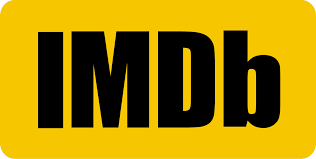

In [16]:
# ——————————————————————————
# 1️⃣ Convertir DataFrame a lista
tmpdfi = dfi.values.tolist()      # Lista original con 748 registros: [review, label]
newdfi = [] # lista de salida que deberá tener los 1000 registros ya debidamente separados.

################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:

# 2️⃣ Unir cada review con su label en un string “review\tlabel”
joined = [
    f"{review}\t{label}"
    for review, label in tmpdfi
]

# 3️⃣ Concatenar todo en un solo bloque de texto con saltos de línea
blob = "\n".join(joined)

# 4️⃣ Dividir el bloque en líneas individuales
lines = blob.split("\n")

# 5️⃣ Separar cada línea en review y label, convertir label a int
for line in lines:
    review_text, label_str = line.split("\t")   # -> ['review', 'label']
    newdfi.append([review_text, int(label_str)])  # Añadir [str, int]

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################

# 6️⃣ Verificar que tenemos 1000 registros
print(f"La nueva lista tiene {len(newdfi)} elementos:", len(newdfi) == 1000)


La nueva lista tiene 1000 elementos: True


In [17]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

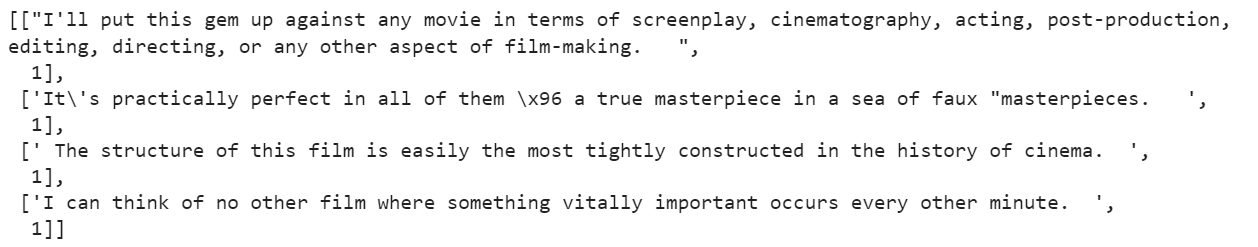

In [18]:
# ———————————————
# Validación de registros específicos (índices 17–20)
# ———————————————

quote = '"'

# a) Definir la lista de reviews esperados
expected_reviews = [
    "I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
        "It's practically perfect in all of them  a true masterpiece in a sea of faux " f"{quote}masterpieces.  ",
    " The structure of this film is easily the most tightly constructed in the history of cinema.  ",
    "I can think of no other film where something vitally important occurs every other minute.  "
]

# b) Extraer los reviews reales de newdfi en los índices 17–20
actual_reviews = [item[0] for item in newdfi[17:21]]  # item = [review, label]

# c) Comparar ambas listas
if actual_reviews == expected_reviews:
    print("🎉 Validación exitosa: los reviews coinciden exactamente.")
else:
    print("❌ Validación fallida: se detectaron discrepancias.")
    # Mostrar diferencias
    for idx, (act, exp) in enumerate(zip(actual_reviews, expected_reviews), start=17):
        if act != exp:
            print(f"  ‼️ Índice {idx}:")
            print(f"    • Actual:   {act}")
            print(f"    • Esperado: {exp}")

🎉 Validación exitosa: los reviews coinciden exactamente.


Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [19]:
# Crear un DataFrame a partir de la lista 'newdfi'
# Cada elemento de 'newdfi' es [review, label], y asignamos nombres claros a las columnas.
dfii = pd.DataFrame(newdfi, columns=['review', 'label'])

# Mostrar información general del DataFrame:
# - Número de filas y columnas
# - Tipo de dato de cada columna
# - Cuenta de valores no nulos
# - Uso de memoria aproximado
dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


---

# 🔀 ¡Vamos a Hacer un Merge de los 1,000 Comentarios! 🔀

> De cada dataset:
> - 📦 **Amazon**
> - 📝 **Yelp**
> - 🎬 **IMDB**

---  


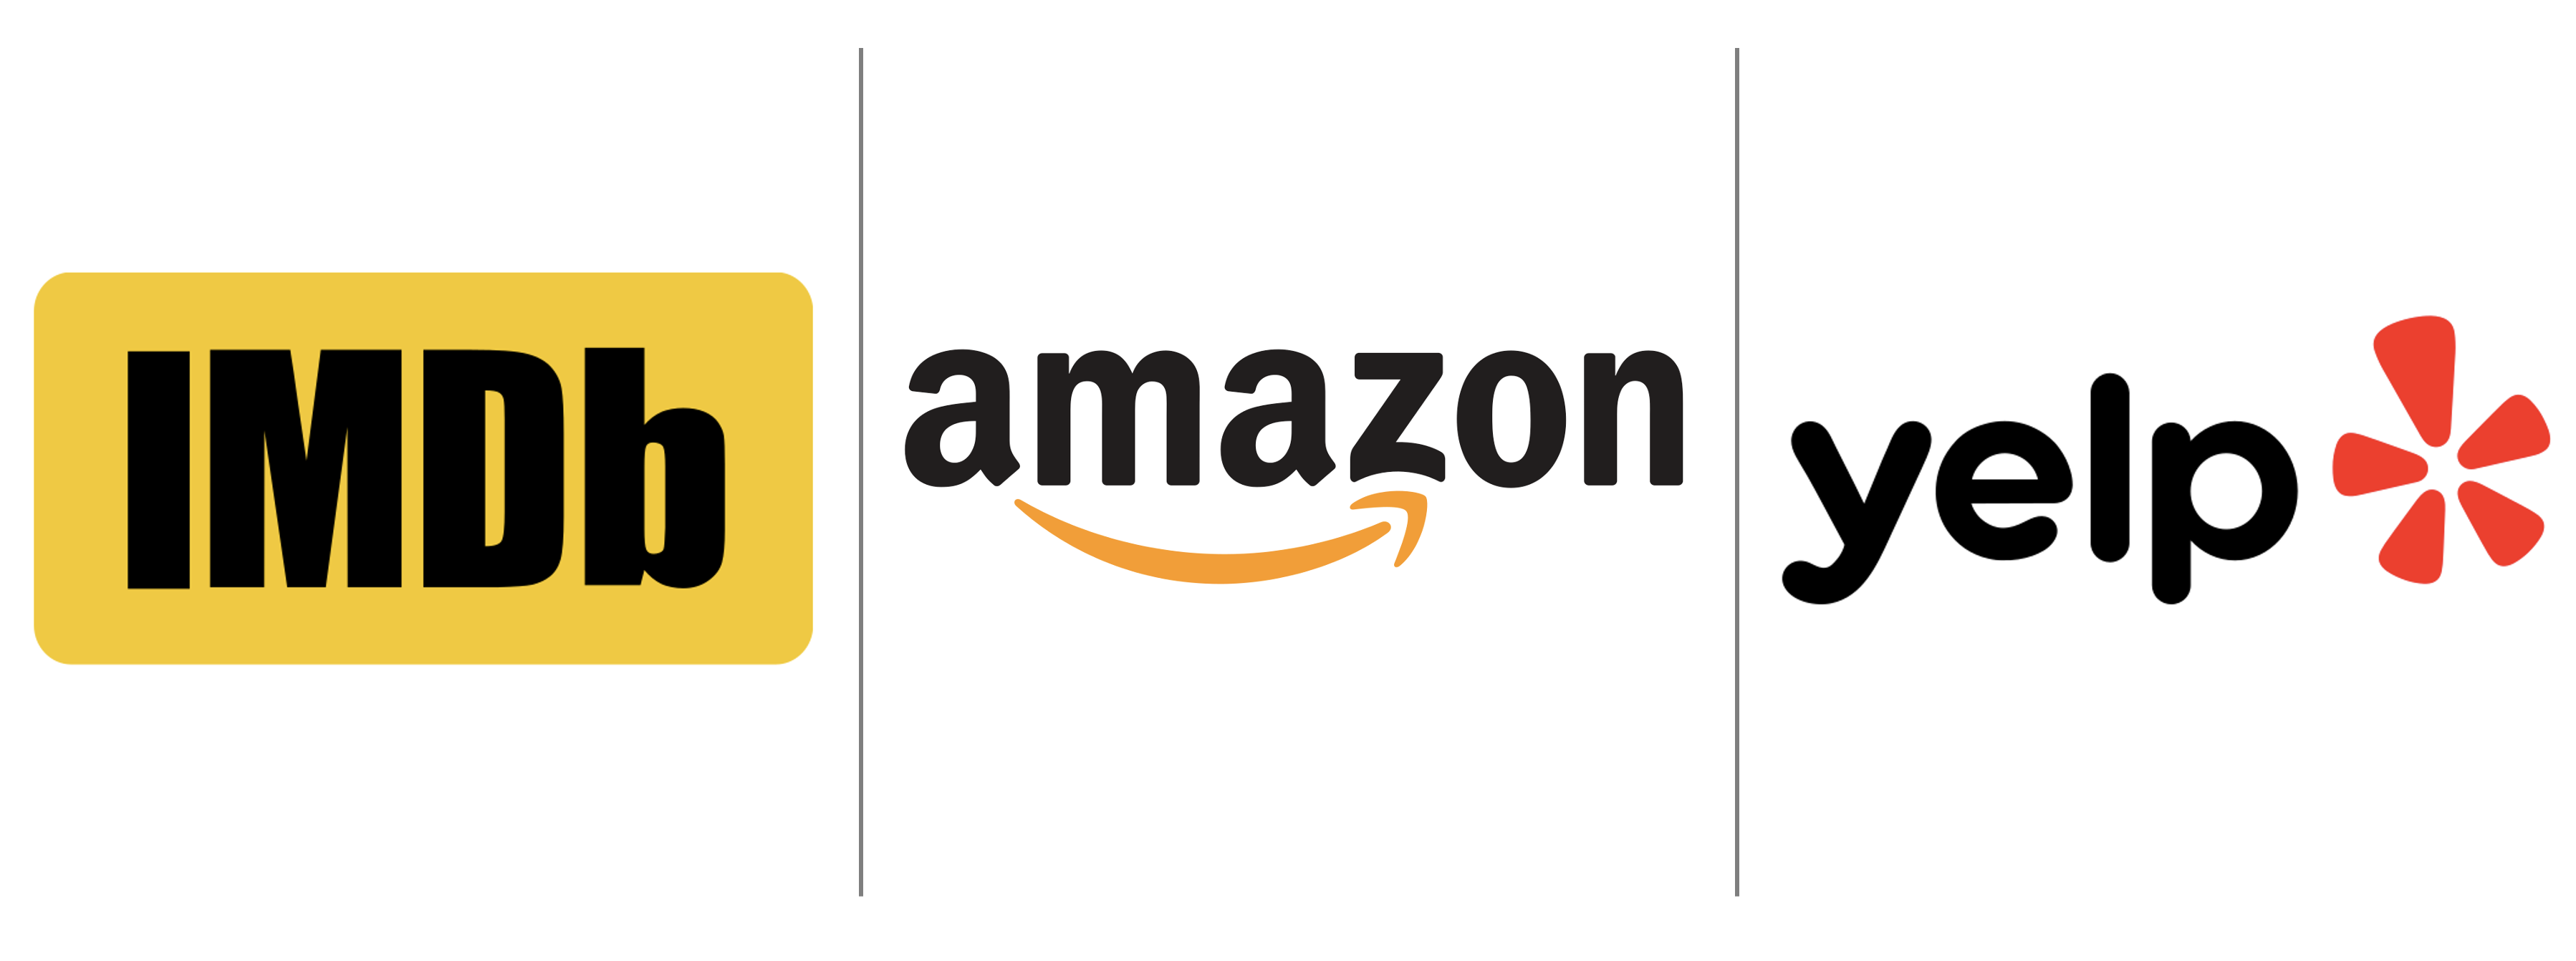

In [20]:
# 📦 Concatenación de todos los datasets en un único DataFrame de 3 000 registros
df = pd.concat(
    [dfa, dfii, dfy],       # Lista de DataFrames: Amazon, IMDB corregido y Yelp
    ignore_index=True       # Reindexa de 0 a 2999 en lugar de mantener índices originales
)

# 🔍 Inspección rápida del DataFrame resultante
# Muestra el número de filas/columnas, tipos de cada columna y uso de memoria
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

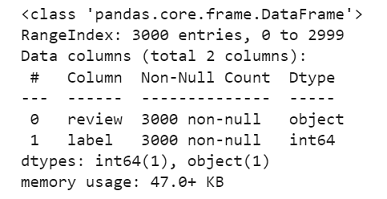

In [21]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

,count
label,
0,1500
1,1500


In [51]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


---

# **Pregunta - 3:**

## 3 - Comentario datos perdidos.

---

### 🤔 Tratamiento de registros extremos

> Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1,125 y 1,788, cuyas salidas deben de ser 10/10. De los 3,000, dos de los comentarios fueron simplemente de esta forma.  
>  
> Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.  
>  
> En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos?  
>  
> **Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1,125 y 1,788. Justifica tu respuesta.**

---  


In [25]:
# Selecciona la fila con índice 1788 de 'df' y todas sus columnas,
# para inspeccionar ese registro completo (verificando tu salida).
df.iloc[1788, :]

,1788
review,10/10
label,1


In [26]:
# Selecciona la fila con índice 1788 de 'df' y todas sus columnas,
# para inspeccionar ese registro completo (verificando tu salida).
df.iloc[1125, :]

,1125
review,10/10
label,1


In [27]:
# ———————————————
# Imprimir las filas 1125 y 1788 del DataFrame 'df'
# ———————————————

# Utilizando iloc con una lista de posiciones
filas_especiales = df.iloc[[1125, 1788], :]

# Mostrar las filas seleccionadas
print("🚀 Filas 1125 y 1788 del DataFrame:")
print(filas_especiales.to_string(index=True))


🚀 Filas 1125 y 1788 del DataFrame:
       review  label
1125  10/10        1
1788  10/10        1


########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**

---
## 🤔 Tratamiento de registros “10/10” (índices 1125 & 1788)

🚀 **Filas extraídas de `df`:**

>     review  label  
>     1125    10/10      1  
>     1788    10/10      1  

### 📝 Interpretación de “10/10”

> Para mí, en mi muy particular punto de vista, cuando digo que algo es **10/10** significa que es **Excelente**, **maravilloso**, que me **encantó**.  
>
> Entonces, a **10/10** (o un patrón similar) lo ponderaría acorde para saber qué tan **bueno** o **malo** es:
>
> - 📍 El **lugar** (caso de Yelp)  
> - 🎬 La **película** (caso de IMDB)  
> - 📦 El **producto** (caso de Amazon)

Creo que la decisión depende del **uso** que demos al dataset y de la **cantidad** de registros afectados. Para casos como estos, podría seguirse este flujo:

1. **Detección**  
   - Usar un _regex_ para identificar patrones `número1/número2` (e.g. `10/10`).

2. **Cálculo**  
   - Convertir ambos números a enteros y calcular `score = número1 / número2`.

3. **Mapeo a etiqueta**  
   - Traducir ese `score` a un texto y label según esta tabla:

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Rango del resultado</th>
    <th class="tg-0lax">Opinión</th>
    <th class="tg-0lax">Etiqueta</th>
    <th class="tg-0lax">Calificación</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0.00 a 0.10</td>
    <td class="tg-0lax">Pésimo</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">1/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.11 a 0.20</td>
    <td class="tg-0lax">Peor</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">2/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.21 a 0.30</td>
    <td class="tg-0lax">Malo</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">3/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.31 a 0.40</td>
    <td class="tg-0lax">Debajo del promedio</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">4/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.41 a 0.50</td>
    <td class="tg-0lax">Promedio</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">5/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.51 a 0.60</td>
    <td class="tg-0lax">Por encima del promedio</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">6/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.61 a 0.70</td>
    <td class="tg-0lax">Bueno</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">7/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.71 a 0.80</td>
    <td class="tg-0lax">Excelente</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">8/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.91 a 9.99</td>
    <td class="tg-0lax">Sobresaliente</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">9/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">10.00 a Infinito</td>
    <td class="tg-0lax">Lo mejor de lo Mejor</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">10/10</td>
  </tr>  
</tbody>
</table>

4. **Incorporación**  
   - Reemplazar el “10/10” original por el texto calculado (e.g. `"Gran Recomendación"`) y su etiqueta numérica.

---

### 🎯 ¿Descartar o ajustar?

- 💾 **Volumen:** Con 3,000 registros y solo 2 de este tipo, no es crítico descartar registros.  
- 🔍 **Calidad:** Para mantener la consistencia es mejor **ajustarlos** mediante el proceso anterior.  
- ⚙️ **Simplicidad:** En un primer pase podríamos:  
  - **Conservarlos** tal cual y documentar el caso.  
  - **O bien**, ajustarlos al paso 3 para homogeneizar el dataset.  

> **Mi recomendación:**  
> Dado que solo son 2 comentarios entre 3,000, sugeriría **ajustarlos** con el método de _regex_ + _mapeo_. Si en etapas posteriores vemos que su impacto es irrelevante, podríamos descartarlos entonces sin mayor complicación.

---  

##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [32]:
# ———————————————
# 1️⃣ Separación de datos en X (features) e Y (labels)
# ———————————————

 # Separamos la información:
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series"

X = df.review     # Serie de strings: cada comentario
Y = df.label      # Serie de enteros: 0 (negativo) y 1 (positivo)

# ———————————————
# 2️⃣ Verificación de las dimensiones esperadas
# ———————————————
assert X.shape == (3000,), f"❌ Error: X tiene {X.shape[0]} registros, se esperaban 3000."
assert Y.shape == (3000,), f"❌ Error: Y tiene {Y.shape[0]} registros, se esperaban 3000."

# ———————————————
# 3️⃣ Mensaje de confirmación si todo está bien
# ———————————————
print("✅ ¡Todo OK! X e Y contienen cada uno 3,000 registros tal como se esperaba.")


✅ ¡Todo OK! X e Y contienen cada uno 3,000 registros tal como se esperaba.


---

##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [ ]:
def clean_tok(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:


  None



  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

  return tokens

In [ ]:
# Aplicamos el proceso de limpieza y tokenización:

Xcleantok = [clean_tok(x) for x in X]

Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [ ]:
for x in Xcleantok[0:5]:
  print(x)

##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

# Aquí puedes incluir las librerías, paquetes o líneas de código necesarias para
# el proceso de limpieza adicional de esta pregunta:

None

def clean_doc(doc):



  None



  return tokens
  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [ ]:
# Aplicamos el proceso de limpieza/normalización adicionales:

Xclean = [clean_doc(x) for x in Xcleantok]

In [ ]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:


None





pt = None
nt = None

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 2:


None


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**


None


###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente.

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [ ]:
from collections import Counter

In [ ]:
midiccionario = Counter()

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))
print('\n(word,frequency):')
print(midiccionario.most_common(10))

In [ ]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:

min_freq = None

midicc = None


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [ ]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [ ]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [ ]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [ ]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

In [ ]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios.

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 8:



None



# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount).

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo.

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 9:


modeloLRcount = None



modeloRFcount = None




modeloNBcount = None





# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

In [ ]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

mejor_modelo_Count = None # incluye el nombre, modeloXXcount, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(test_x_count)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:


modeloLRtfidf = None



modeloRFtfidf = None




modeloNBtfidf = None





# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

In [ ]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:

mejor_modelo_Tfidf = None # incluye el nombre, modeloXXtfidf, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*mejor_modelo_Tfidf.score(test_x_tfidf, y_test)))

pred = mejor_modelo_Tfidf.predict(test_x_tfidf)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad.

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**


None


###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**